In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Consistency

In [2]:
population = [2, 5, 2, 10, 6]
sample_size = 7
pop_mean = np.mean(population)
sample = np.random.choice(population, size=sample_size)

In [3]:
def test_consistency(population, estimator,
                    min_size=10,
                    max_size=1000000,
                    size_step=100):
    estimates = []
    sample_sizes = range(min_size, max_size, size_step)
    pop_mean = np.mean(population)
    for sample_size in sample_sizes:
        sample = np.random.choice(population, size=sample_size)
        estimate = estimator(sample)
        estimates.append(estimate)
    
    # plot how fast we converge
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(sample_sizes, estimates, '.', label='estimate')
    ax1.plot(sample_sizes, np.ones_like(sample_sizes) * pop_mean)
    
    ax2.plot(sample_sizes, np.abs(np.array(estimates) - pop_mean), '.')
    ax2.plot(sample_sizes, np.zeros_like(sample_sizes))
    plt.show()

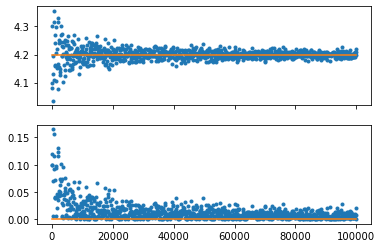

In [12]:
population = [1, 5, 4, 2, 9]
test_consistency(population, np.mean, max_size=100000)

In [5]:
def first_element_estimator(sample):
    return sample[0]

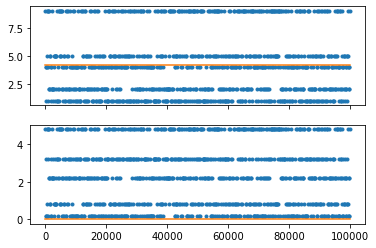

In [6]:
test_consistency(population, first_element_estimator, max_size=100000)

In [7]:
def midrange_estimator(sample):
    return (np.max(sample) + np.min(sample)) / 2

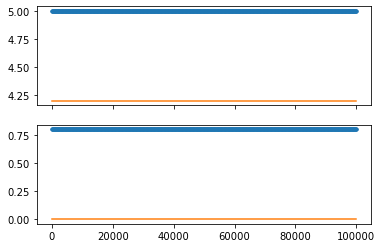

In [8]:
test_consistency(population, midrange_estimator, max_size=100000)

In [9]:
def mean_with_coef_estimator(sample):
    n = len(sample)
    return np.mean(sample) * n / (n - 1)

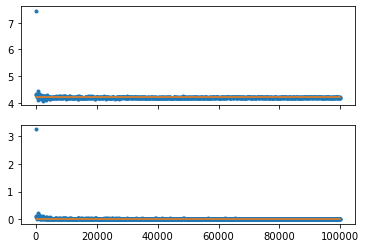

In [10]:
test_consistency(population, mean_with_coef_estimator, max_size=100000)

### Bias

In [2]:
def find_bias(population, estimator, sample_size, iterations=100000):
    estimates = []
    pop_mean = np.mean(population)
    pop_var = np.var(population)
    for i in range(iterations):
        sample = np.random.choice(population, size=sample_size)
        estimate = estimator(sample)
        estimates.append(estimate)
    return np.abs(np.mean(estimates) - pop_mean)

In [20]:
population = [1, 2, 5, 4, 8, 4]
print('Bias: ', find_bias(population, np.mean, 3))
print('Population stdev: ', np.std(population))

Bias:  0.0033400000000001207
Population stdev:  2.23606797749979


As we can see the the bias is not too big when compared with stdev

In [21]:
print('Bias: ', find_bias(population, mean_with_coef_estimator, 3))

Bias:  1.9945649999999997


In [22]:
print('Bias: ', find_bias(population, first_element_estimator, 3))

Bias:  0.0014599999999997948
